# Model fitting exercise

In [1]:
# Load libraries and data
library(here)
Ringlets <- read.csv(here("Exercises", "Model_Fitting", "Ringlets.csv"))

here() starts at /Users/otodreas/Lund/Courses/BIOS13/BIOS13-Coursework


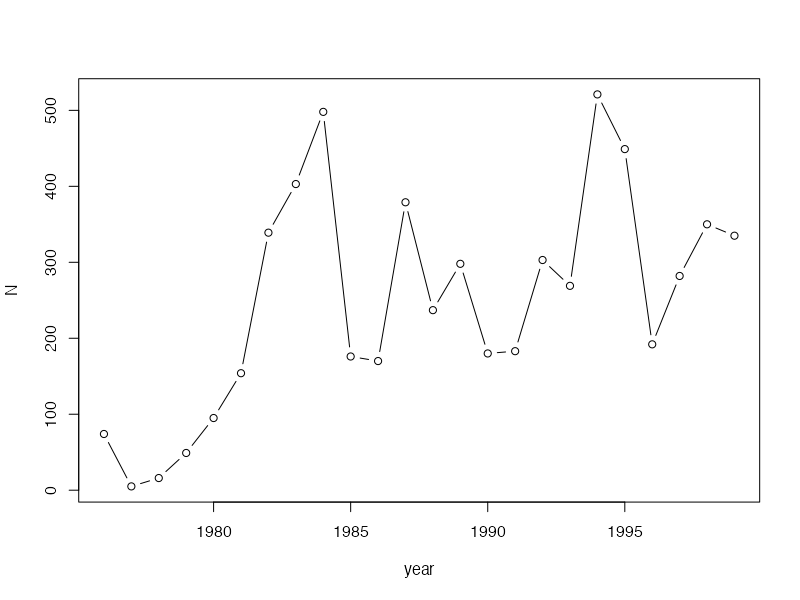

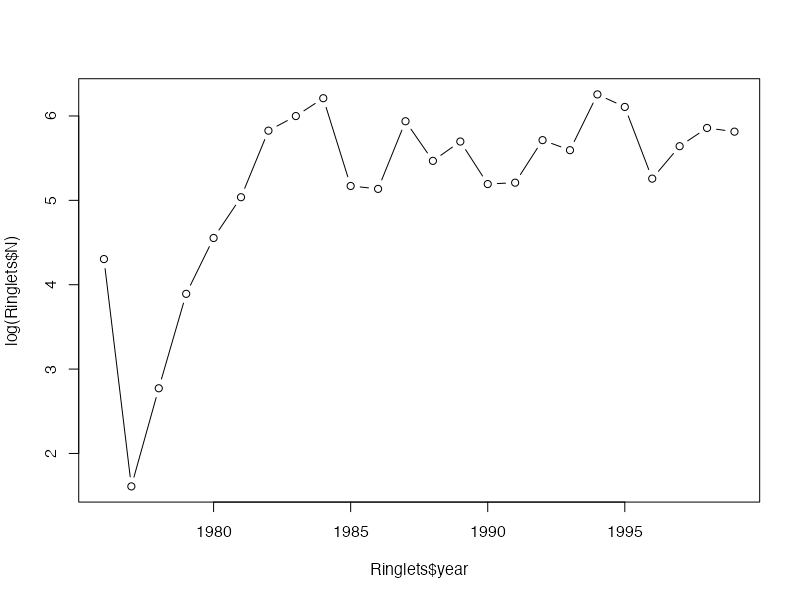

In [2]:
plot(Ringlets, type = "b")  # Plot raw data
plot(Ringlets$year, log(Ringlets$N), type = "b")  # Plot log data

Goal: fit a model, use the model to predict the future of the population.

The Ricker model predicts population size at time $t+1$ given population at time $t$. In other words, we use $N_1 - N_23$ to predict $N_2 - N_24$.

$$
\hat{N}_{t+1} = N_t e^{r_0 \left( 1 - \frac{N_t}{K} \right)}
$$

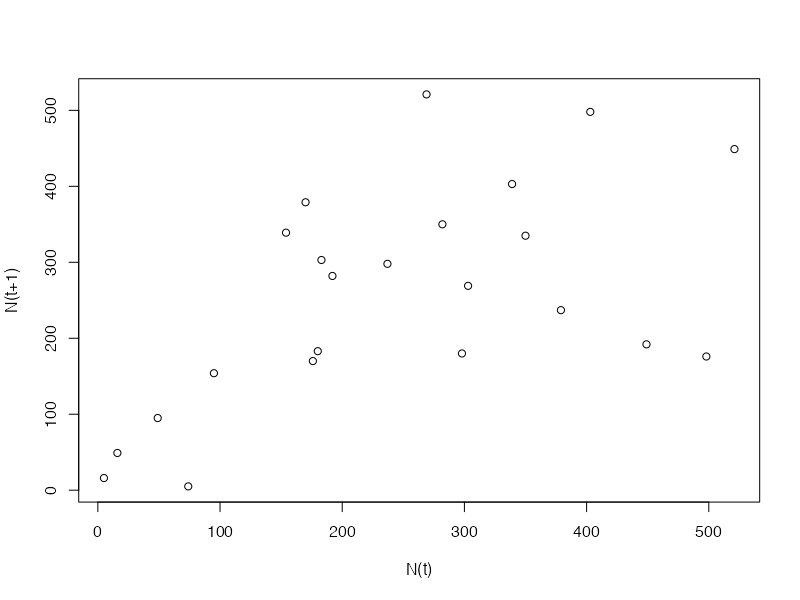

In [5]:
# Create two vectors with corresponding population sizes
Nt <- Ringlets$N[1:23]
Ntplus1 <- Ringlets$N[2:24]
plot(Nt, Ntplus1, xlab = "N(t)", ylab = "N(t+1)")  # Plot

It's hard to say if the above plot looks like a Ricker function.

Below, we use `nls` (non-linear least squares function) to estimate $r_0$ and $K$ parameters.

In [7]:
Rickerfit <- nls(
  Ntplus1 ~ Nt*exp(r0 * (1 - Nt / K)),
  data = list(Nt = Nt),
  start = list(r0 = 1, K = 100)
)
summary(Rickerfit)


Formula: Ntplus1 ~ Nt * exp(r0 * (1 - Nt/K))

Parameters:
   Estimate Std. Error t value Pr(>|t|)    
r0   0.8913     0.2212   4.029 0.000606 ***
K  329.3594    29.7616  11.067 3.19e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 103.9 on 21 degrees of freedom

Number of iterations to convergence: 5 
Achieved convergence tolerance: 1.72e-06


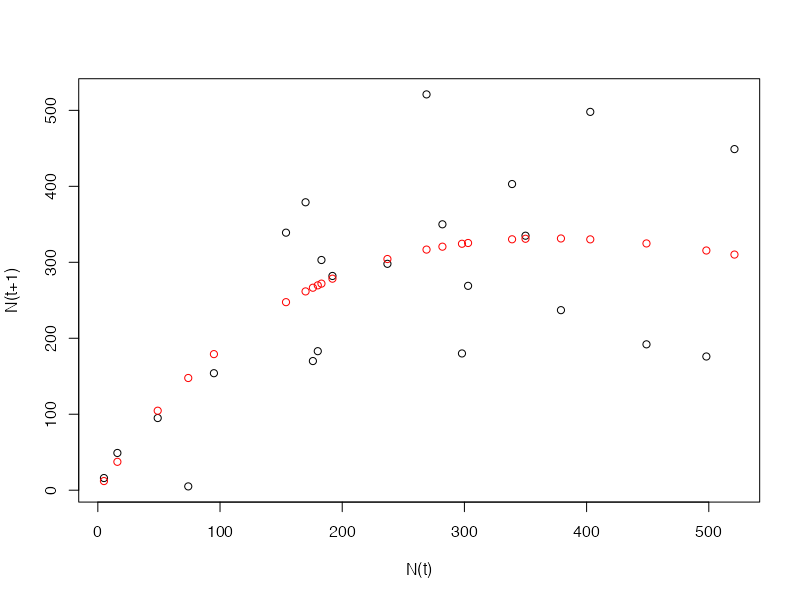

In [10]:
# Add predicted values to the previous plot
plot(Nt, Ntplus1, xlab = "N(t)", ylab = "N(t+1)")
points(Nt, fitted(Rickerfit), col = "red")

Above, see that a Ricker function was fitted to the data.

Below, see that the magnitude of the residuals seems to increase with population $\left( N_t \right)$.

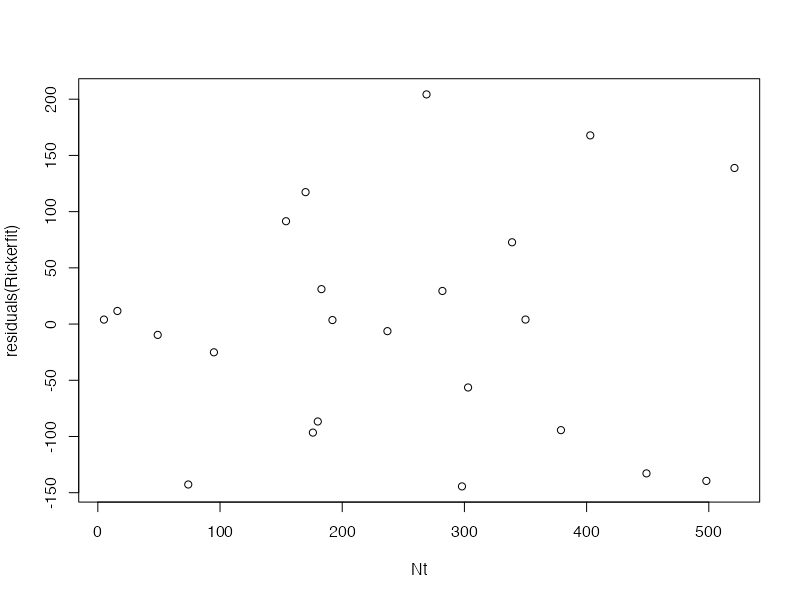

In [12]:
plot(Nt, residuals(Rickerfit))

To avoid this problem, we want to 